In [2]:
import pandas as  pd
dataset = pd.read_csv(r"Job_Placement_Data.csv")

print(dataset)

    gender  ssc_percentage ssc_board  hsc_percentage hsc_board hsc_subject  \
0        M           67.00    Others           91.00    Others    Commerce   
1        M           79.33   Central           78.33    Others     Science   
2        M           65.00   Central           68.00   Central        Arts   
3        M           56.00   Central           52.00   Central     Science   
4        M           85.80   Central           73.60   Central    Commerce   
..     ...             ...       ...             ...       ...         ...   
210      M           80.60    Others           82.00    Others    Commerce   
211      M           58.00    Others           60.00    Others     Science   
212      M           67.00    Others           67.00    Others    Commerce   
213      F           74.00    Others           66.00    Others    Commerce   
214      M           62.00   Central           58.00    Others     Science   

     degree_percentage undergrad_degree work_experience  emp_te

In [3]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB
None


In [4]:
xSample = dataset.iloc[:,1:12]
ySample = dataset.status

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

ySample = le.fit_transform(ySample)
ySampleName = le.classes_#!!!!  #category name

print(ySample)
print(ySampleName)

[1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0
 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0
 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0]
['Not Placed' 'Placed']


In [6]:
list = ["ssc_board","hsc_board","hsc_subject","undergrad_degree","work_experience","specialisation"]

for li in list:
    xSample[li] = le.fit_transform(xSample[li])

    print(xSample)

     ssc_percentage  ssc_board  hsc_percentage hsc_board hsc_subject  \
0             67.00          1           91.00    Others    Commerce   
1             79.33          0           78.33    Others     Science   
2             65.00          0           68.00   Central        Arts   
3             56.00          0           52.00   Central     Science   
4             85.80          0           73.60   Central    Commerce   
..              ...        ...             ...       ...         ...   
210           80.60          1           82.00    Others    Commerce   
211           58.00          1           60.00    Others     Science   
212           67.00          1           67.00    Others    Commerce   
213           74.00          1           66.00    Others    Commerce   
214           62.00          0           58.00    Others     Science   

     degree_percentage undergrad_degree work_experience  emp_test_percentage  \
0                58.00         Sci&Tech              No

In [7]:
print(xSample.corr()) #correlation

                     ssc_percentage  ssc_board  hsc_percentage  hsc_board  \
ssc_percentage             1.000000   0.116194        0.511472   0.066996   
ssc_board                  0.116194   1.000000       -0.137013   0.605883   
hsc_percentage             0.511472  -0.137013        1.000000  -0.019548   
hsc_board                  0.066996   0.605883       -0.019548   1.000000   
hsc_subject                0.236364   0.050919       -0.164091   0.152227   
degree_percentage          0.538404   0.038070        0.434206   0.067229   
undergrad_degree           0.205896   0.100863       -0.086450   0.057960   
work_experience            0.175675  -0.040744        0.141025   0.038357   
emp_test_percentage        0.261993  -0.018991        0.245113   0.039108   
specialisation            -0.172536  -0.051565       -0.241630   0.002232   
mba_percent                0.388478   0.083120        0.354823   0.090201   

                     hsc_subject  degree_percentage  undergrad_degree  \
ss

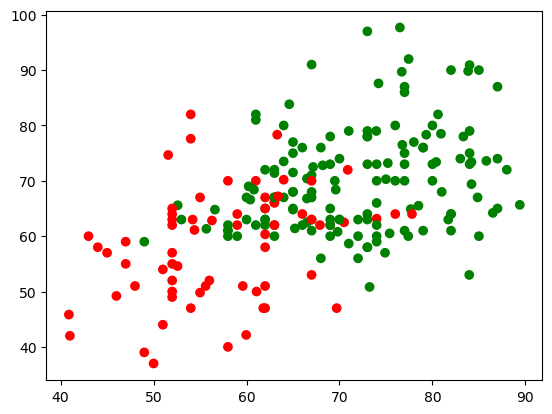

In [8]:
import matplotlib.pyplot as plt

x = xSample.iloc[:,0]
y = pd.Series(ySample)

x1 = xSample.iloc[:,2]
colors ={0:"red",1:"green"}
plt.scatter(x, x1, c= y.map(colors))
plt.show()


In [9]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(xSample,ySample,test_size=0.2,random_state=42) 

print(f"""
    xTrain: {xTrain.shape},
    xTest: {xTest.shape}, 
    
    yTrain: {yTrain.shape},
    yTest: {yTest.shape}
    """)


    xTrain: (172, 11),
    xTest: (43, 11), 
    
    yTrain: (172,),
    yTest: (43,)
    


In [14]:
from sklearn. neighbors import KNeighborsClassifier as NGC
from sklearn.metrics import classification_report, confusion_matrix

classifier_model = NGC(n_neighbors=5,metric="minkowski", p=1) #hiperparametre optimizasyonları düzenlenebilir!
classifier_model.fit(xTrain,yTrain)

y_test_prediction = classifier_model.predict(xTest)

In [16]:
#Desicion Tree ALgorithm

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="gini", splitter="best",random_state=42)  #gini, entropi, 3rd?
model.fit(xTrain,yTrain)
y_test_prediction = model.predict(xTest)

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

#RandomForestClassifier 
model = RandomForestClassifier(n_estimators = 1000) #estimators: kaç tane karar ağacıyla belirlenecğine bakar
model.fit(xTrain,yTrain)
y_test_prediction = model.predict(xTest)

SVM(Support Vector Machine): Düzlem üzerine yerleştirilmiş noktalari ayirmak için kullanilir.
Amaci iki sinifin noktalarinin maksimum uzaklikta olmasını sağlamak. Karmaşık ama orta-küçük 
veri setleri için uygun. 

C parametresi ile margini kontrol edebiliriz. C ne kadar büyükse margin o kadar dardır.Model overfite doğru kayıyorsa C azaltılabilir.

Hard Margin: Noktaları kesin olarak ayrılması konusunda çok hassastır. Sınıflandırmayı güçleştirir.
Soft Margin: Noktalar birbiriyle iç içe geçebilir.

SVM Kernel: Karmaşık datasetlerini ayırmada kernellerın yardımı dokunur. Elimizdeki verileri kernel fonksiyonlarıyla çarparak daha iyi sonuçlar alabiliriz.

Linear Kernel: Doğrusal,Daha hızlı

Gaussian Radial Basis Function(RBF): Linear olmayan değerler için kullanılır, gama parametresi eklenir, sklearn default kütüphanesidir. En çok tercih edilen gama değeri 0.1'dir.

Sigmoid Kernel: Genellikle yapay sinir ağlarında kullanılır.

In [26]:
from sklearn.svm import SVC

classifier_model = SVC(C=5, kernel='rbf',gamma=0.1)
classifier_model.fit(xTrain,yTrain)
y_test_prediction =  model.predict(xTest)
print(yTestPred)
print(yTest)

[1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
[1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1]


Naive Bayes: Sınıfını tespit etmeyi amaçlar. Gerçek dünya durumlarında beklenenden iyi çalışır. Bayes Teoremine dayanır.
Alakasız özelliklerle ilişkiye girmemektedir. Zor verilerde çalışabilir. Az verilerde iyi iş çıkarır. Basit ve kolaydır.
Gaussian Naive Bayes: Continious verilerle çalışır.
Multinominal Naive Bayes: Çok sınıflı kategorilerde kullanılır.
Bernoulli Naive Bayes: Multinonominalden farkı boolean(ikili) sınıflandırma yapar.

In [33]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(xTrain,yTrain)
y_test_prediction =  model.predict(xTest)
print(y_test_prediction)
print(yTest)

[1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1]
[1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1]


Logistic Regression : Hem binary hem multiclass classification için kullanılır.
Formülü sigmoinddir. Optimizasyon problemlerinde kullanılacak olan algoritmadır. Küçük veriler için liblinear, büyükler için sag veya saga kullanılır.

Avantajları: Uygulaması da yorumlaması da kolaydır. Linear veri setlerinde mükemmele yakın çalışır. Overfit'e daha az meyillidir.

Dezavantajları: Gözlem sayısı özellik sayısından azsa kullanılmamalıdır(Overfitting'e neden olabilir.)

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0,max_iter=1000,solver="newton-cg")
model.fit(xTrain,yTrain)
y_test_prediction =  model.predict(xTest)
print(y_test_prediction)
print(yTest)

[1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1]
[1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1]


              precision    recall  f1-score   support

  Not Placed       0.82      0.75      0.78        12
      Placed       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43



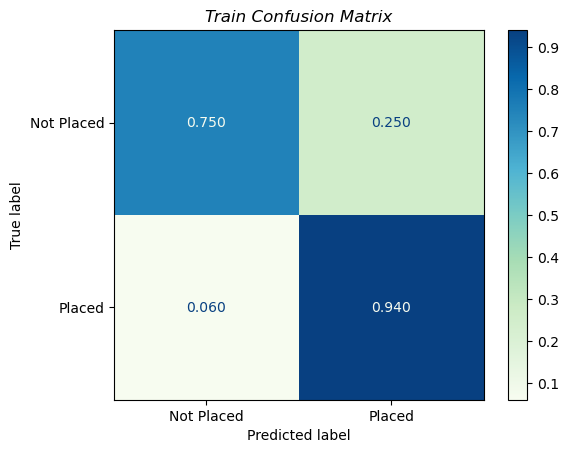

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
print(classification_report(yTest,y_test_prediction, target_names=["Not Placed","Placed"]))
cm = confusion_matrix(yTest, y_test_prediction,normalize="true").round(2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Placed","Placed"])
disp = disp.plot(cmap = plt.cm.GnBu, values_format='.3f')
plt.title(f"Train Confusion Matrix", style="italic")
plt.show()